In [1]:
from data.get_data import *
from utils import *
from models.cifar10_model import *
from models.mnist_model import *
from models.disco_model import *

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import pyplot as plt

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
clf_model = mnistmodel_B().to(device)
clf_model.load_state_dict(torch.load('./saved_model/mnist_B.pth'))

<All keys matched successfully>

In [5]:
g_ba = generator_ba().to(device)
g_ba.load_state_dict(torch.load('./saved_model/collaborative_gan_mnist_B/g_ba.pth'))

<All keys matched successfully>

In [6]:
n = np.random.randint(0,10000)
img = normalMnist('test').data[n:n+1]
img_label = normalMnist('test').labels[n:n+1]

In [7]:
torch.manual_seed(1)
img_atk = FGSM(clf_model,eps=0.3).perturb(img.to(device),img_label.to(device)).cpu()

In [8]:
clean_img = g_ba(img_atk.to(device)).cpu().detach()[0][0]

Text(0.5, 1.0, 'Collaborative GAN defense')

<Figure size 432x288 with 0 Axes>

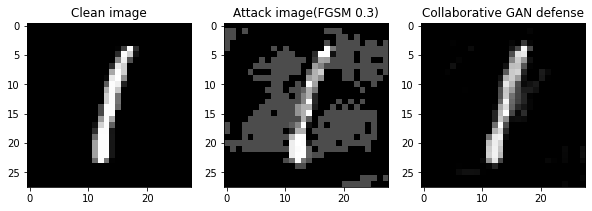

In [9]:
plt.gray()
fig,ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(img[0][0])
ax[0].set_title('Clean image')
ax[1].imshow(img_atk[0][0])
ax[1].set_title('Attack image(FGSM 0.3)')
ax[2].imshow(clean_img)
ax[2].set_title('Collaborative GAN defense')